In [12]:
import pandas as pd
import os
import numpy as np
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('df_cat_2_results.csv')

In [17]:
df['is_wrong_pred'] = df['is_wrong_pred'].fillna(0)

In [18]:
df_10 = df[(df['is_wrong_true'] == 1) & (df['is_wrong_pred'] == 0)]
df_10.shape

(10, 35)

In [16]:
df_23 = df[(df['is_wrong_true'] == 1) & (df['is_wrong_pred'] == 1)]
df_23.shape

(23, 35)

In [10]:
def calc_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

In [20]:
for i, row in df_10.iterrows():
    if not math.isnan(row['distance_pred']):
        distance = calc_distance((row['latitude_corr'], row['longitude_corr']), (row['latitude_pred'], row['longitude_pred']))
        print(distance)
    else:
        print('Nan, no distance calculated')

0.1565737894838052
2.093865045229666
0.2896614266773517
Nan, no distance calculated
0.39818165185364385
0.7985521650545677
0.2888306549957759
0.21309084745657367
0.5589368724066456
0.3481981946634595


In [26]:
distances = []

for i, row in df_23.iterrows():
    if not math.isnan(row['distance_pred']):
        distance = calc_distance((row['latitude_corr'], row['longitude_corr']), (row['latitude_pred'], row['longitude_pred']))
        distances.append(distance*1000)
    else:
        distances.append(None)

In [28]:
colors = ['blue' if d > 100 else 'red' for d in distances]

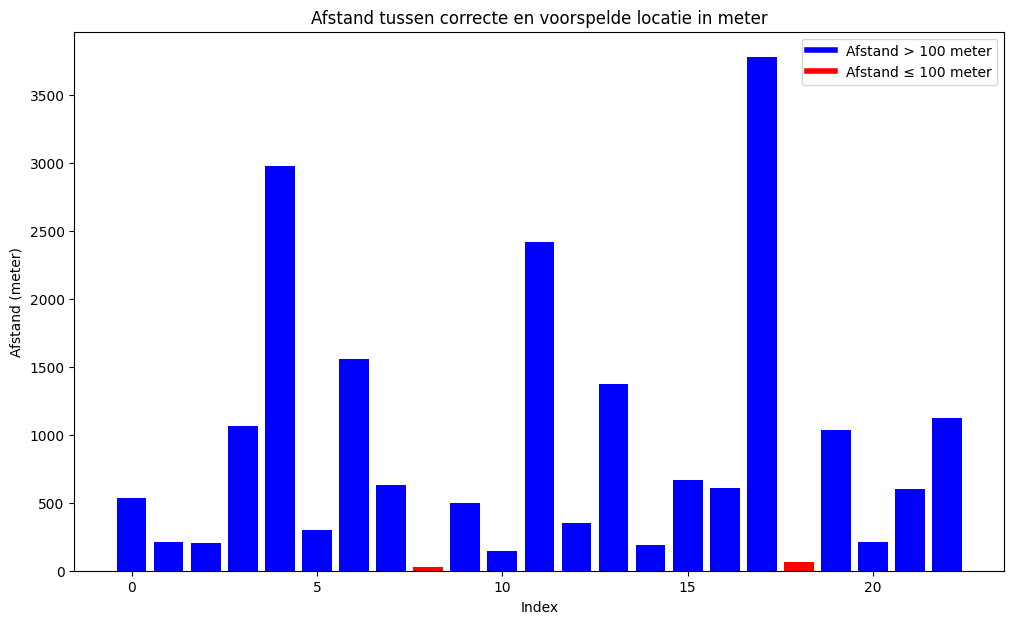

In [34]:
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 7))
bars = plt.bar(range(len(distances)), distances, color=colors, width=0.8)

legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Afstand > 100 meter'),
                   Line2D([0], [0], color='red', lw=4, label='Afstand ≤ 100 meter')]
plt.legend(handles=legend_elements)

plt.xlabel('Index')
plt.ylabel('Afstand (meter)')
plt.title('Afstand tussen correcte en voorspelde locatie in meter')
plt.show()